# Aerofit Data Analysis

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.





## Business Problem

The market research team at AeroFit wants **to identify the characteristics of the target audience for each type of treadmill** offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

# Objective


Create a descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('fitness_brand.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Dataset Characteristics**
Dataset contains following columns

* Product Purchased: KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
* Age : In years, age of the customer who purchased
* Gender: Gender of the purchased customer
* Education: represented in years
* Marital Status: Single or partnered
* Usage: The average number of times the customer has planned to use the treadmill each week
* Fitness: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
* Miles: The average number of miles the customer expects to walk or run each week
* Income: Annual income of the user in Dollars $

In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Descriptive Analysis of the dataset**

* Total count of all columns is 180
* Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.
* Education: Mean Education is 15 with maximum as 21 and minimum as 12.
* Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* Fitness: Average rating is 3.3 on a scale of 1 to 5.
* Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and minimum is 21.
* Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K

In [12]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [28]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values are present in the data

In [30]:
df.duplicated().sum()

0

No duplicate values are present in the data

In [8]:
df.describe(include =object).T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [19]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [21]:
df['Age'].nunique()

32

In [22]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [23]:
# Number of customer againts the rating scale 1 to 5
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [24]:
df['Product'].value_counts().sort_index()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [25]:
# Number of Single and Partnered customers
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

# Univarate Analysis


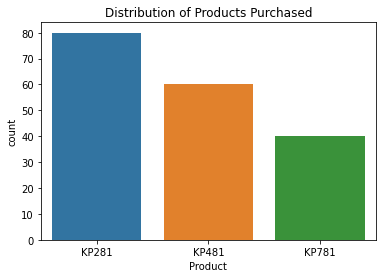

In [35]:
# Product Purchased (Categorical Variable)
sns.countplot(x='Product', data=df)
plt.title('Distribution of Products Purchased')
plt.show()


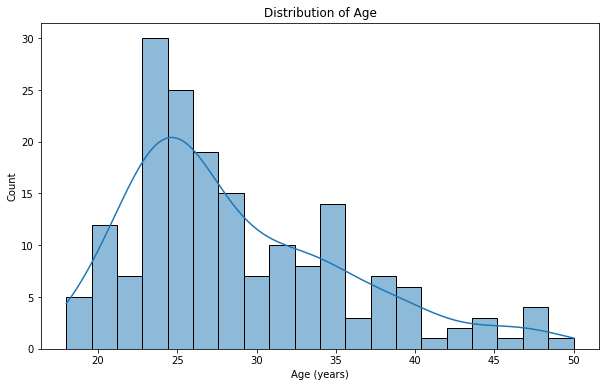

In [38]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.show()

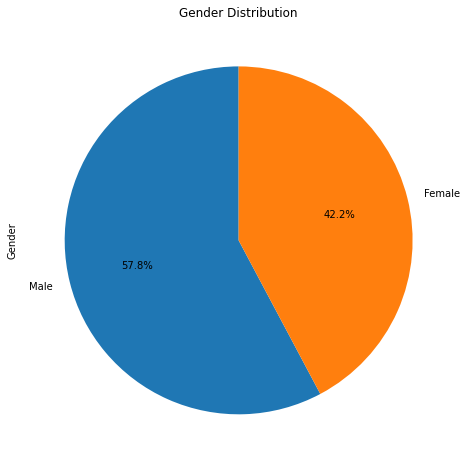

In [39]:
# Gender Distribution
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

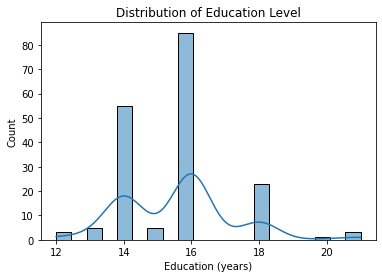

In [5]:
# Distribution of Education Level Among Purchasers
sns.histplot(df['Education'], bins=20, kde=True)
plt.title('Distribution of Education Level')
plt.xlabel('Education (years)')
plt.show()

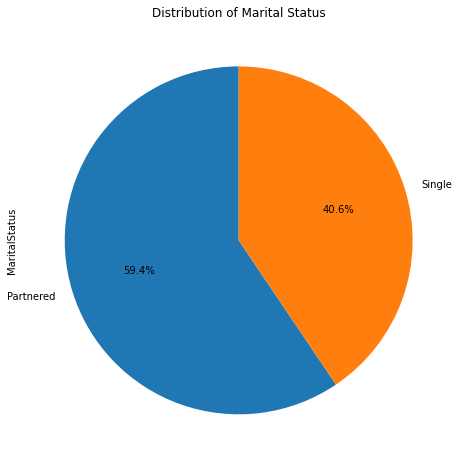

In [42]:
#Distribution of Marital Status
plt.figure(figsize=(8, 8))
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.show()

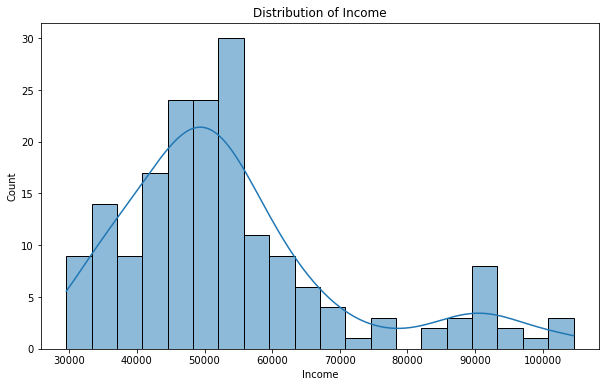

In [44]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.show()

# Bivarate Analysis

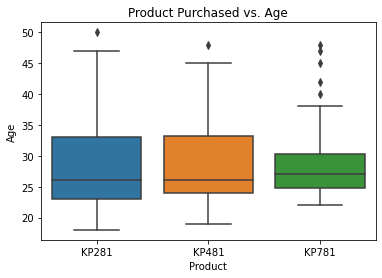

In [4]:
# Product Purchased Vs Age
sns.boxplot(x='Product', y='Age', data=df)
plt.title('Product Purchased vs. Age')
plt.show()

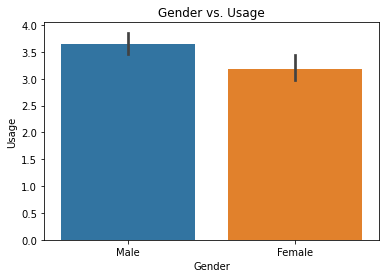

In [6]:
# Gender Vs Usage
sns.barplot(x='Gender', y='Usage', data=df)
plt.title('Gender vs. Usage')
plt.show()

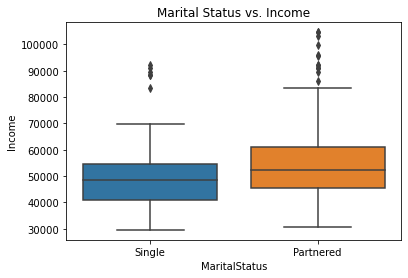

In [44]:
#Marital Status Vs Income
sns.boxplot(x='MaritalStatus', y='Income', data=df)
plt.title('Marital Status vs. Income')
plt.show()


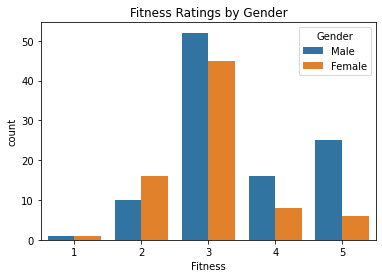

In [45]:
# Fitness Ratings in Gender
sns.countplot(x='Fitness', hue='Gender', data=df)
plt.title('Fitness Ratings by Gender')
plt.show()

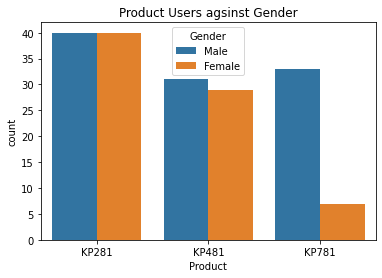

In [47]:
# Distribution of gebders among each Product Category
sns.countplot(x='Product', hue='Gender', data=df)
plt.title('Product Users agsinst Gender')
plt.show()

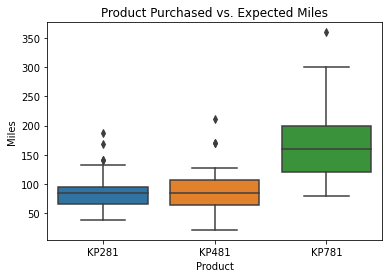

In [50]:
#Product Purchased vs. Expected Miles
sns.boxplot(x='Product', y='Miles', data=df)
plt.title('Product Purchased vs. Expected Miles')
plt.show()

# Conditional and Marginal Probabilities

**Two-Way Contingency Table**

**Marginal Probabilities**

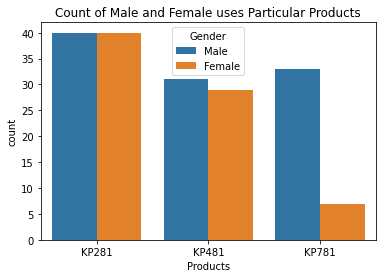

In [7]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [8]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [9]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

* product KP281 is : 44.44 % (cheapest / entry level product)

* product KP481 is : 33.33 % (intermediate user level product)

* product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probabilities**

In [11]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 % <br>

KP481 | Female = 38 % <br>

KP781 | Female = 10 % <br>

KP281 | male = 38 % <br>

KP481 | male = 30 % <br>

KP781 | male = 32 %<br>

Probability of Female customer buying KP281(52.63%) is more than male(38.46%). <br>

KP281 is more recommended for female customers. <br>

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).<br>

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%). <br>

KP481 product is specifically recommended for Female customers who are intermediate user.<br>

#  Objective: Customer Profiling for Each Product #

Customer profiling based on the 3 product categories provided

**KP281**

* Easily affordable entry level product, which is also the maximum selling product. <br>

* KP281 is the most popular product among the entry level customers. <br>

* This product is easily afforded by both Male and Female customers. <br>

* Average distance covered in this model is around 70 to 90 miles. <br>

* Product is used 3 to 4 times a week. <br>

* Most of the customer who have purchased the product have rated Average shape as the fitness rating.<br>

**KP481**

* This is an Intermediate level Product.

* KP481 is the second most popular product among the customers.

* Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

* Customers Prefer this product mostly to cover more miles than fitness.

* Average distance covered in this product is from 70 to 130 miles per week.

* More Female customers prefer this product than males.


**KP781**

* Due to the High Price & being the advanced type, customer prefers less of this product.

* Customers use this product mainly to cover more distance.

* Customers who use this product have rated excelled shape as fitness rating.

* Customer walk/run average 120 to 200 or more miles per week on his product.

* Customers use 4 to 5 times a week at least.

* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

**Recommendations**



* Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

* KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

* As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

* KP781 product should be promotted using influencers and other international atheletes.

* Research required for expanding market beyond 50 years of age considering health pros and cons.